In [5]:
#Importação das bibliotecas necessárias - Essa célula deve ser executada antes de todas as outras
import skimage as sk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Parte 1.1 - Imagens coloridas

## Alteração do item a



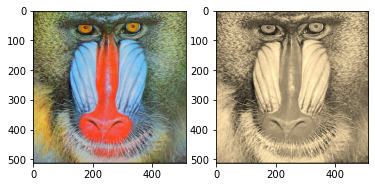

In [2]:
# directory = os.path.dirname("__file__")
# img_dir = os.path.join(directory, os.pardir, 'color', 'baboon.png')

img = io.imread('../color/baboon.png')

if img is None:
    sys.exit("Could not read the image.")
 
#Alteração de imagens coloridas segundo a seguinte fórmula:
#   R’ = 0.393R + 0.769G + 0.189B
#   G’ = 0.349R + 0.686G + 0.168B
#   B’ = 0.272R + 0.534G + 0.131B   

row, col, depth = np.shape(img)

new_img = np.zeros(np.shape(img), dtype=np.uint16)

#Transformação das fórmulas em matriz
weight = np.array([[0.393, 0.769, 0.189], [0.349, 0.686, 0.168], [0.272, 0.534, 0.131]])

#Aplicação do filtro de maneira vetorizada
new_img[:,:,0] = img[:,:,0] * weight[0][0] + img[:,:,1] * weight[0][1] + img[:,:,2] * weight[0][2]
new_img[:,:,1] = img[:,:,0] * weight[1][0] + img[:,:,1] * weight[1][1] + img[:,:,2] * weight[1][2]
new_img[:,:,2] = img[:,:,0] * weight[2][0] + img[:,:,1] * weight[2][1] + img[:,:,2] * weight[2][2]

new_img[new_img > 255] = 255

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(new_img)
plt.show()


## Alteração do item b

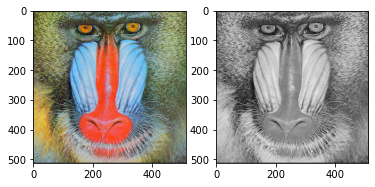

In [3]:
img = io.imread('../color/baboon.png')

if img is None:
    sys.exit("Could not read the image.")


#Conversão de imagem RGB para monocromática segundo a seguinte fórmula:
#   I = 0.2989R + 0.5870G + 0.1140B


row, col, depth = np.shape(img)

new_img = np.zeros((row, col), dtype=np.int16)

weight = np.array([0.2989, 0.587, 0.114])

new_img[:,:] = img[:,:,0] * weight[0] + img[:,:,1] * weight[1] + img[:,:,2] * weight[2]

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
#aqui é necessário informar ao pyplot que a imagem é monocromática
axarr[1].imshow(new_img, cmap = 'gray')
plt.show()


# Parte 1.2 - Imagens monocromáticas

### Função de convolução - a célula precisa ser executada antes daquelas que aplicarão os filtros

In [69]:

'''
    Argumentos:
        img: imagem original
        mask: matriz de convolução
        f_name: nome da imagem de saída (string)
    Retorno:
        new_img: imagem filtrada
'''

def convolution(img, mask, f_name):
    pad_size = len(mask[0])//2
    mask_size = len(mask[0])
    p_img = np.pad(img, pad_size)
    row, col = np.shape(img)
    
    new_img = np.zeros((row, col), dtype=np.int32)

    # Divide a matriz da imagem em submatrizes com o tamanho da máscara (centradas em cada pixel da imagem original)
    windows = sk.util.shape.view_as_windows(p_img, (mask_size, mask_size))

    # Cálculo da convolução: multiplica a máscara pelas submatrizes elemento a elemento e depois os soma, gerando um novo pixel
    new_img = np.sum(np.multiply(mask, windows[:][:]), axis = (2, 3))

    new_img[new_img < 0] = 0
    new_img[new_img > 255] = 255
    new_img = new_img.astype(np.uint8)

    io.imsave("../results/" + f_name + ".png", new_img)

    return new_img

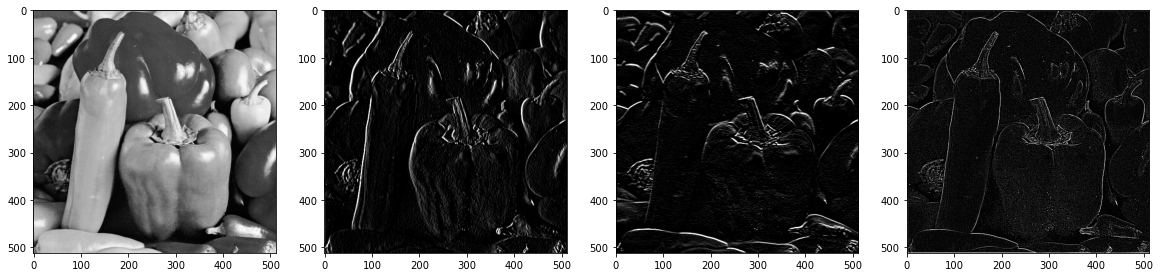

In [66]:
img = io.imread('../mono/peppers.png')

if img is None:
    sys.exit("Could not read the image.")

h1 = np.array([[-1, 0, 1], 
               [-2, 0, 2], 
               [-1, 0, 1]])

h2 = np.array([[-1, -2, -1], 
               [0, 0, 0], 
               [1, 2, 1]])    

f, axarr = plt.subplots(1,4, figsize = (20,20))
axarr[0].imshow(img, cmap = 'gray')
# Informa o pyplot que a imagem é monocromática
axarr[1].imshow(convolution(img, h1, 'h1'), cmap = 'gray')
axarr[2].imshow(convolution(img, h2, 'h2'), cmap = 'gray')
axarr[3].imshow(convolution(img, h3, 'h3'), cmap = 'gray')
plt.show()

In [ ]:
img = io.imread('../mono/peppers.png')

if img is None:
    sys.exit("Could not read the image.")

h3 = np.array([[-1, -1, -1], 
               [-1, 8, -1], 
               [-1, -1, -1]])

h8 = np.array([[0, 0, -1, 0, 0],
               [0, -1, -2, -1, 0],
               [-1, -2, 16, -2, -1],
               [0, -1, -2, -1, 0],
               [0, 0, -1, 0, 0]])

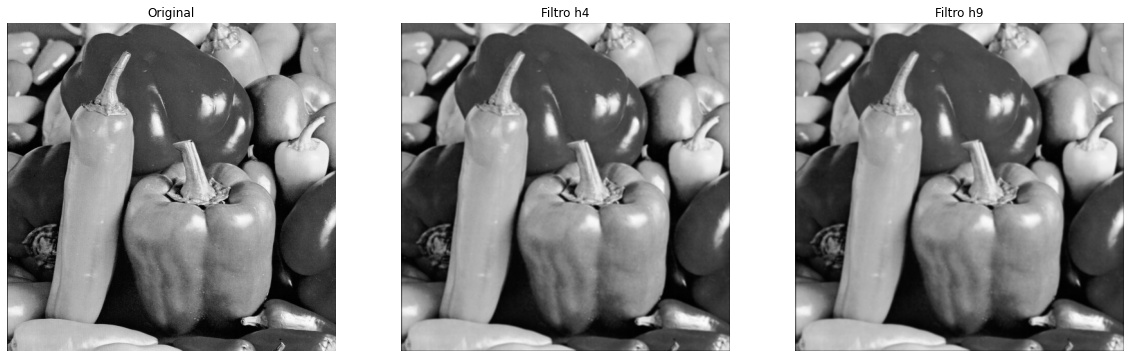

In [98]:
img = io.imread('../mono/peppers.png')

if img is None:
    sys.exit("Could not read the image.")

h4 = np.ones((3, 3)) * 1/9

h9 = np.array([[1, 4, 6, 4, 1],
               [4, 16, 24, 16, 4],
               [6, 24, 36, 24, 6],
               [4, 16, 24, 16, 4],
               [1, 4, 6, 4, 1]]) * 1/256

f, axarr = plt.subplots(1, 3, figsize = (20,20))
axarr[0].imshow(img, cmap = 'gray')
axarr[0].set_title("Original")
axarr[0].axis('off')

axarr[1].imshow(convolution(img, h4, 'h4'), cmap = 'gray')
axarr[1].set_title("Filtro h4")
axarr[1].axis('off')

axarr[2].imshow(convolution(img, h9, 'h9'), cmap = 'gray')
axarr[2].set_title("Filtro h9")
axarr[2].axis('off')

plt.show()

(-0.5, 511.5, 511.5, -0.5)

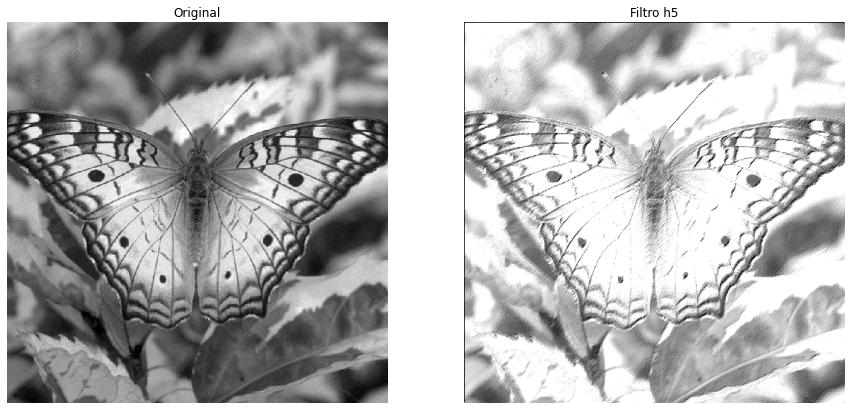

In [95]:
img = io.imread('../mono/butterfly.png')

if img is None:
    sys.exit("Could not read the image.")

h5 = np.array([[1, -1, 2], 
               [-1, 2, -1],
               [2, -1, -1]])

f, axarr = plt.subplots(1, 2, figsize = (15,15))
axarr[0].imshow(img, cmap = 'gray')
axarr[0].set_title("Original")
axarr[0].axis('off')

axarr[1].imshow(convolution(img, h5, 'h5'), cmap = 'gray')
axarr[1].set_title("Filtro h5")
axarr[1].axis('off')

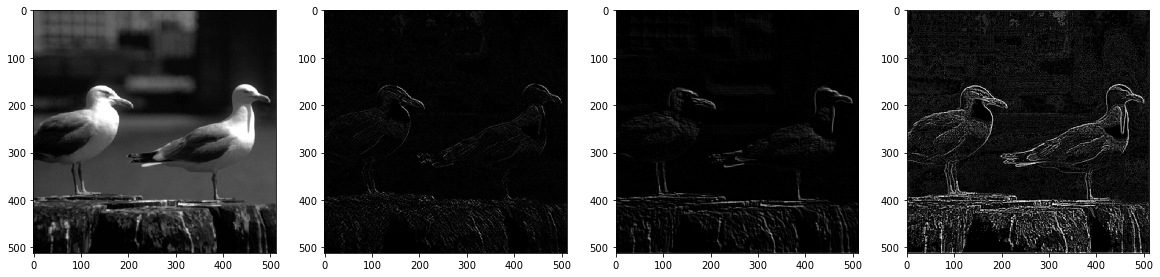

In [93]:
img = io.imread('../mono/seagull.png')

if img is None:
    sys.exit("Could not read the image.")

h6 = np.array([[2, -1, -1], 
               [-1, 2, -1], 
               [-1, -1, 2]])

h7 = np.array([[0, 0, 1], 
               [0, 0, 0], 
               [-1, 0, 0]])



f, axarr = plt.subplots(1, 4, figsize = (20,20))
axarr[0].imshow(img, cmap = 'gray')
axarr[1].imshow(convolution(img, h6, 'h6'), cmap = 'gray')
axarr[2].imshow(convolution(img, h7, 'h7'), cmap = 'gray')
axarr[3].imshow(convolution(img, h8, 'h8'), cmap = 'gray')